# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of predicting the sale price of bulldozers.

## 1. Problem Defination

> How well can we predict the future sale price of a bulldozer, given it's characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers Competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main Datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation 
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

**NOTE** For more on the evalution of this project check:
https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview/evaluation

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://www.kaggle.com/c/bluebook-for-bulldozers/data?select=Data+Dictionary.xlsx

In [199]:
import datetime

print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-06-24 15:45:18.738657


In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [201]:
# Import training and validation sets
df = pd.read_csv("TrainAndValid.csv", low_memory= False)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [203]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

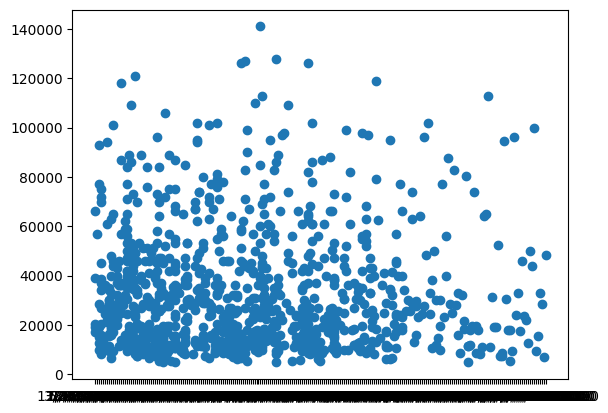

In [204]:
# Plot one of the most important data (in this case we have considered Saledate)
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

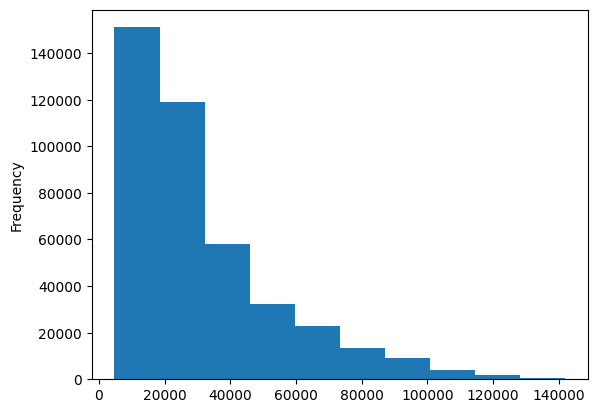

In [205]:
df.SalePrice.plot.hist();

## Parsing dates

When we work with time series data, we want to enrich the time and data component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter 

In [206]:
# Import data again but this time parse dates
df = pd.read_csv("TrainAndValid.csv",
                 low_memory= False,
                 parse_dates= ["saledate"])

In [207]:
df.saledate.dtype
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

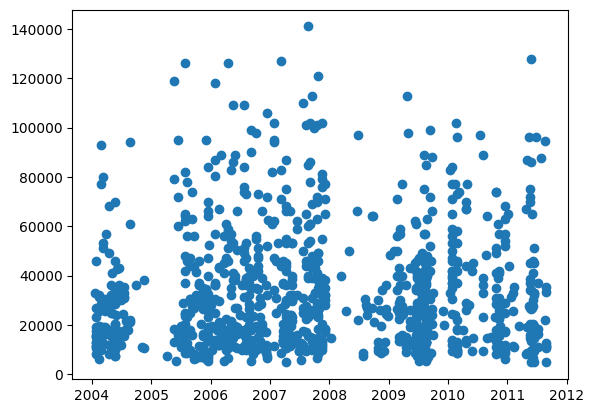

In [208]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [209]:
df.head().T
# We use th eabove line code since our data frame was getting truncated

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [210]:
df["saledate"].head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [211]:
# Sort DataFrame in data order
df.sort_values(by=["saledate"], inplace = True, ascending= True)
df["saledate"].head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original DataFrame so when we manipulate the copy, we've still got our original data.

In [212]:
# Make a copy of the orignal DataFrame to perform edits on
df_temp = df.copy()

### Add datetime parameters for `saledate` column

In [213]:
df_temp["SaleYear"] = df_temp.saledate.dt.year
df_temp["SaleMonth"] = df_temp.saledate.dt.month
df_temp["SaleDay"] = df_temp.saledate.dt.day
df_temp["SaleDayOfWeek"] = df_temp.saledate.dt.day_of_week
df_temp["SaleDayofYear"] = df_temp.saledate.dt.day_of_year

In [214]:
df_temp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [215]:
# Now we've enriched our DataFrame with Date time features, we can remove saledate
df_temp.drop("saledate", axis = 1, inplace = True)

In [216]:
# Check the values of different columns
df_temp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas here: https://pandas.pydata.org/pandas-docs/version/1.4/reference/general_utility_functions.html#:~:text=Data%20types%20related%20functionality,-api.types.union_categoricals&text=Combine%20list%2Dlike%20of%20Categorical%2Dlike%2C%20unioning%20categories.&text=Efficiently%20infer%20the%20type%20of,list%2Dlike%20array%20of%20values.&text=Convert%20input%20into%20a%20pandas,or%20a%20numpy%20dtype%20object.



In [217]:
df_temp.head().dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

In [218]:
pd.api.types.is_object_dtype(df_temp["UsageBand"])

True

In [219]:
# Find the columns which contain strings
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [220]:
# This will turn all of the string, object and bool value into category values
for label, content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()
    if pd.api.types.is_object_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()
    if pd.api.types.is_bool_dtype(content):
        df_temp[label] = content.astype("category").cat.as_ordered()

In [221]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [222]:
df_temp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [223]:
df_temp.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

Thanks to pandas Categories we now have a way to accessall of our data in the form of numbers.

But we still have a bunch of missing data

In [224]:
# Check the ratio of missing data
df_temp.isna().sum() / len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

### Save preprocessed data

In [225]:
# Export current tmp dataframe
df_temp.to_csv("train_temp.csv", index = False)

In [226]:
# Import preprocessed data
df_temp = pd.read_csv('train_temp.csv', low_memory=False)

In [227]:
df_temp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Fill missing values

### Fill numeric missing values first

In [228]:
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
SaleYear
SaleMonth
SaleDay
SaleDayOfWeek
SaleDayofYear


In [229]:
# Check for which numeric columns have null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [230]:
# Fill numeric rows with the median
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary colum which tell us if teh data is missing or not.
            df_temp[label + "_is_missing"] = pd.isnull(content)
            # Fill missing numeric values wiht median
            df_temp[label] = content.fillna(content.median())

In [231]:
# Check if there's any null values
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [232]:
# Check to see how many examples were missing
df_temp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [233]:
df_temp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categroical variables into numbers

In [234]:
# Check for column which aren't numeric
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [235]:
# Turn Categorical variables into numners and fill mssing
for label, content in df_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whehter sample had missing values
        df_temp[label+'_is_missing'] = pd.isnull(content)
        # Turn categories into numbers and add + 1
        df_temp[label] = pd.Categorical(content).codes + 1

In [236]:
pd.Categorical(df_temp["state"]).codes + 1

array([44,  9,  9, ...,  5,  5,  5], dtype=int8)

In [237]:
pd.Categorical(df_temp["UsageBand"]).codes + 1

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [238]:
df_temp.dtypes.value_counts()

bool       46
int8       40
int64      10
int16       4
float64     3
Name: count, dtype: int64

In [239]:
df_temp.T.head(10)

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
auctioneerID,18.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984,1976,1986,1970,1987,1966,...,1998,2005,2005,2004,2000,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UsageBand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fiModelDesc,4593,1820,2348,1819,2119,2298,3126,979,2224,82,...,989,536,4261,4818,1319,2101,240,627,83,989


Now that all of our data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [242]:
%%time

# Instantiate model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                              random_state= 42)

# Fit the model
X = df_temp.drop("SalePrice", axis = 1)
y = df_temp['SalePrice']
model.fit(X, y)

CPU times: total: 29min 25s
Wall time: 4min 30s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [243]:
# Score the model
model.score(X, y)

0.9875468079970562

**Question:** Why doesn't the above metric hold water? (why isn't the metric reliable)


### Splitting data into train/validation sets

In [244]:
df_temp.SaleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: SaleYear, Length: 412698, dtype: int64

In [245]:
# Split data into training and validation
df_val = df_temp[df_temp.SaleYear == 2012]
df_train = df_temp[df_temp.SaleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [246]:
# Split data into X and y
X_Train, y_train = df_train.drop("SalePrice", axis = 1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis = 1), df_val.SalePrice 

X_Train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Building an evaluation function

In [247]:
# Create evaluation function (the competition using RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rsmle(y_test, y_preds):
    """
    Calculate root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels

def show_scores(model):
    train_preds = model.predict(X_Train)
    val_preds = model.predict(X_valid)
    scores = {"Train MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rsmle(y_train, train_preds),
              "Valid RMSLE": rsmle(y_valid, val_preds ),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores


## Testing our model on a subset (to tune the hyperparameters)

In [248]:
# # This takes far too long for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state = 42)

# model.fit(X_train, y_train)

In [249]:
# Change max_Samples value
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1,
                              random_state= 42,
                              max_samples=10000)


In [250]:
%%time
# Cutting down on the max number of samples each estimator can see impacts the time it takes to fit the model
model.fit(X_Train, y_train)

CPU times: total: 47.8 s
Wall time: 7.49 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [252]:
show_scores(model)

{'Train MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

### Hyperparameter tuning with RandomizedSearchCV

In [253]:
# %%time 
# from sklearn.model_selection import RandomizedSearchCV

# # Different RandomForestRegressor hyperparameters
# rf_grid = {"n_estimators": np.arange(10, 100, 10),
#             "max_depth": [None, 3, 5, 10],
#             "min_samples_split": np.arange(2, 20, 2),
#             "min_samples_leaf": np.arange(1, 20, 2),
#             "max_features": [0.5, 1, "sqrt"],
#             "max_samples": [20000]}

# # Instantiate RandomizedSearchCV model
# rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
# random_state = 42),
# param_distributions = rf_grid,
# n_iter = 2,
# cv = 5,
# verbose = True)

# # Fit the RandomizedSearchCV model 
# rs_model.fit(X_Train, y_train)

In [254]:
# Find the best model hyperparameters
# rs_model.best_params_

In [255]:
# # Evaluate the randomizedSearch model
# show_scores(rs_model)

# # Here we have used very few iterations hence we got a poor data, if we were to make more iterations the score could have improved

### Train a model with the best hyperparameters

**Note**: These were after 100 iterations of `RandomizedSearchCV`

In [256]:
%%time

# Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators = 40,
                                    min_samples_leaf = 1,
                                    min_samples_split=14,
                                    max_features = 0.5,
                                    n_jobs = -1,
                                    max_samples = None,
                                    random_state = 42)

# Fit the ideal model
ideal_model.fit(X_Train, y_train)

CPU times: total: 5min 17s
Wall time: 52.8 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [257]:
# Scores for ideal model
show_scores(ideal_model)

{'Train MAE': 2953.8161137163484,
 'Valid MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Valid RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Valid R^2': 0.8818019502450094}

In [258]:
# Scores on rs_model
show_scores(rs_model)

{'Train MAE': 5666.347550339452,
 'Valid MAE': 7070.030545440629,
 'Training RMSLE': 0.2600174037310478,
 'Valid RMSLE': 0.28750501610310303,
 'Training R^2': 0.8547473053581265,
 'Valid R^2': 0.8344522911062404}

## Make predictions on test data

In [259]:
# Import the test data
df_Test = pd.read_csv('Test.csv', 
                      low_memory= False,
                      parse_dates=["saledate"])

In [260]:
# test_preds = ideal_model.predict(df_Test)

# This will give an error becausethe we had made manipulation to the train data

### Preprocessing the data (getting the test datasheet in the same format as our training dataset)

In [261]:
def preprocess_Data(df):
    """ 
    Perform transformations on df and returns transformed df.
    """

    df['SaleYear'] = df.saledate.dt.year
    df['SaleMonth'] = df.saledate.dt.month
    df['SaleDay'] = df.saledate.dt.day
    df['SaleDayOfWeek'] = df.saledate.dt.dayofweek
    df['SaleDayofYear'] = df.saledate.dt.dayofyear

    df.drop("saledate", axis = 1, inplace = True)

    # Fill the numerc rows into median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():

                # Add a binary colum which tells us if the data was missing
                df[label+'_is_missing'] = pd.isnull(content)
                
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

    # Filled categorial missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+'_is_missing'] = pd.isnull(content)

            # We add +1 to the category code
            df[label] = pd.Categorical(content).codes + 1

    return df

In [262]:
# Process Test Data
df_Test = preprocess_Data(df_Test)

In [263]:
df_Test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [264]:
X_Train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


In [265]:
# We can find how the columns differ using sets
set(X_Train.columns) - set(df_Test.columns)

{'auctioneerID_is_missing'}

In [266]:
# Manually adjust df_test to have auctioneerID_is_missing columm
df_Test["auctioneerID_is_missing"] = False
df_Test.head

<bound method NDFrame.head of        SalesID  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0      1227829    1006309     3168         121             3      1999   
1      1227844    1022817     7271         121             3      1000   
2      1227847    1031560    22805         121             3      2004   
3      1227848      56204     1269         121             3      2006   
4      1227863    1053887    22312         121             3      2005   
...        ...        ...      ...         ...           ...       ...   
12452  6643171    2558317    21450         149             2      2008   
12453  6643173    2558332    21434         149             2      2005   
12454  6643184    2558342    21437         149             2      1000   
12455  6643186    2558343    21437         149             2      2006   
12456  6643196    2558346    21446         149             2      2008   

       MachineHoursCurrentMeter  UsageBand  fiModelDesc  fiBaseModel  ...  \
0   

In [267]:
df_Test = df_Test[X_Train.columns]

Finally now our dataframe has the same features as our training dataframe, we can make predictions!

In [268]:
# Make predictions on this test data
test_preds = ideal_model.predict(df_Test)

In [269]:
test_preds

array([17030.00927386, 14355.53565165, 46623.08774286, ...,
       11964.85073347, 16496.71079281, 27119.99044029])

In [270]:
# Format predictions into same formet is after kaggle

df_preds = pd.DataFrame()
df_preds['SalesID'] = df_Test['SalesID']
df_preds['SalePrice'] = test_preds
df_preds

,SalesID,SalePrice
0,1227829,17030.009274
1,1227844,14355.535652
2,1227847,46623.087743
3,1227848,71680.261335
4,1227863,61762.999424
...,...,...
12452,6643171,39966.363007
12453,6643173,12049.704433
12454,6643184,11964.850733
12455,6643186,16496.710793


In [271]:
# Export Prediction data
df_preds.to_csv("test-predictions", index=False)

# Feature Importance
Since we've built a model which is able to make predictions. The people you share these predictions with (or yourself) might be curious of what parts of the data led to these predictions.

This is where **feature importance** comes in. Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **target variable**.

In our case, after our model learned the patterns in the data, which bulldozer sale attributes were most important for predicting its overall sale price?

Beware: the default feature importances for random forests can lead to non-ideal results.

To find which features were most important of a machine learning model, a good idea is to search something like "[MODEL NAME] feature importance".

Doing this for our RandomForestRegressor leads us to find the feature_importances_ attribute.

Let's check it out.

In [272]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.39445533e-02, 1.81148281e-02, 4.09167072e-02, 1.70752171e-03,
       3.40797459e-03, 2.08200698e-01, 2.95067052e-03, 1.10113725e-03,
       4.16122668e-02, 4.71911805e-02, 6.23815431e-02, 4.67433955e-03,
       1.52524442e-02, 1.52517337e-01, 4.72224713e-02, 5.96817956e-03,
       1.29351899e-03, 2.78088439e-03, 2.37248769e-03, 6.17114453e-02,
       8.13525488e-04, 3.61873268e-05, 9.19098115e-04, 2.23170993e-04,
       1.28102678e-03, 2.06519636e-05, 2.01477316e-03, 6.63364759e-03,
       2.15274492e-03, 2.50178165e-03, 4.63902393e-03, 3.85873985e-03,
       2.76062667e-03, 1.00782454e-03, 2.47969268e-04, 6.04239818e-03,
       7.64997072e-04, 1.57100537e-02, 2.29716203e-03, 2.58372272e-03,
       8.07637426e-04, 9.18548690e-04, 1.35656446e-03, 5.81458569e-04,
       4.96716928e-04, 3.79552257e-04, 5.31712788e-04, 2.71823509e-03,
       8.34294376e-04, 3.12136841e-04, 2.14075157e-04, 7.42422919e-02,
       3.80158492e-03, 5.67641024e-03, 2.87154703e-03, 9.83349904e-03,
      

In [274]:
import seaborn as sns

def plot_features(columns, importances, n = 20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances,}).sort_values("feature_importance", ascending=False).reset_index(drop=True))
    
    sns.barplot(x= 'feature_importance',
                y = 'features',
                data = df[:n],
                orient="h")

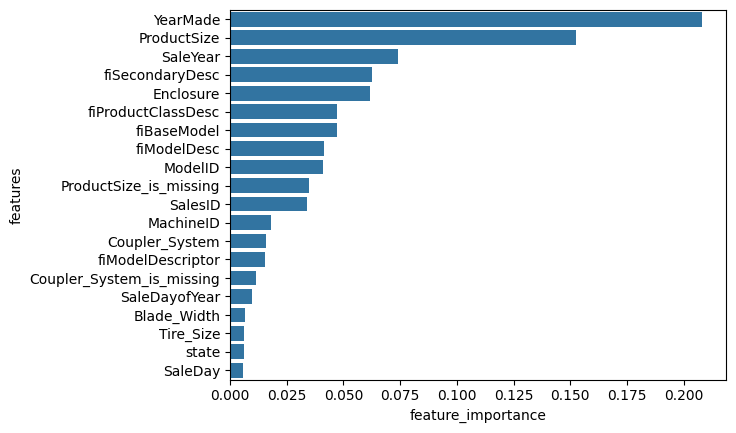

In [275]:
plot_features(X_Train.columns, ideal_model.feature_importances_)

In [276]:
sum(ideal_model.feature_importances_)

1.0000000000000002

In [277]:
df.ProductSize.isna().sum()

216605

In [278]:
df.ProductSize.value_counts()

ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: count, dtype: int64

In [279]:
df.Turbocharged.value_counts()

Turbocharged
None or Unspecified    77111
Yes                     3985
Name: count, dtype: int64

In [280]:
df.Thumb.value_counts()

Thumb
None or Unspecified    85074
Manual                  9678
Hydraulic               7580
Name: count, dtype: int64